In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
data = pd.read_csv('training_data.csv')

In [66]:
# Check the shape of the dataset
print("Dataset Shape:", data.shape)

# Check the properties of the dataset
print("Dataset Info:")
print(data.info())

Dataset Shape: (4920, 134)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB
None


In [67]:
data = data.drop_duplicates()  # Remove duplicate rows
data = data.fillna(0)
# Check the shape of the dataset
print("Dataset Shape:", data.shape)

# Check the properties of the dataset
print("Dataset Info:")
print(data.info())

Dataset Shape: (304, 134)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 0 to 407
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 320.6+ KB
None


<ipython-input-55-73939944b6b9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


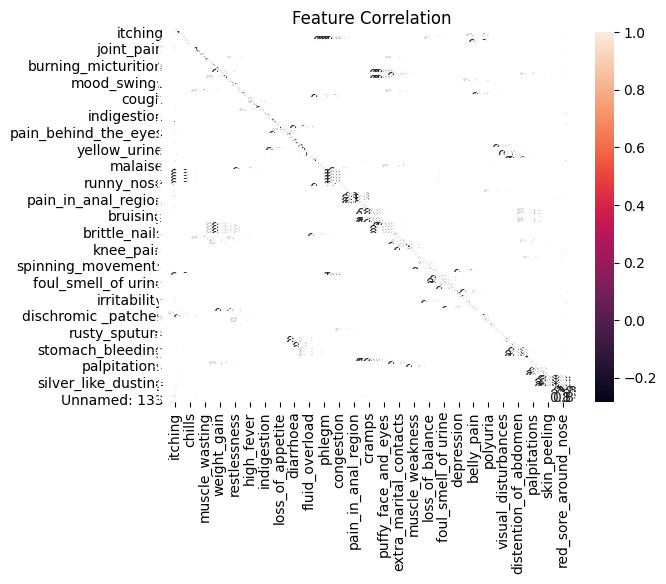

In [55]:
correlation = data.corr()
sns.heatmap(correlation, annot=True)
plt.title("Feature Correlation")
plt.show()

In [68]:
features = data.drop('prognosis', axis=1)
labels = data['prognosis']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [70]:
from sklearn.preprocessing import MinMaxScaler #fixed import

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
models = {
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [74]:
for model_name, model in models.items():
    print('Training', model_name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, labels=labels.unique())
    print('Accuracy:', accuracy)
    print('Classification Report:')
    print(report)
    print('---')

Training Naive Bayes
Accuracy: 0.9672131147540983
Classification Report:
                                         precision    recall  f1-score   support

                       Fungal infection       0.00      0.00      0.00         0
                                Allergy       1.00      0.33      0.50         3
                                   GERD       0.00      0.00      0.00         0
                    Chronic cholestasis       1.00      1.00      1.00         2
                          Drug Reaction       1.00      1.00      1.00         1
                    Peptic ulcer diseae       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                              Diabetes        1.00      1.00      1.00         2
                        Gastroenteritis       0.00      0.00      0.00         0
                       Bronchial Asthma       1.00      1.00      1.00         3
                          Hypertens

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Accuracy: 1.0
Classification Report:
                                         precision    recall  f1-score   support

                       Fungal infection       0.00      0.00      0.00         0
                                Allergy       1.00      1.00      1.00         3
                                   GERD       0.00      0.00      0.00         0
                    Chronic cholestasis       1.00      1.00      1.00         2
                          Drug Reaction       1.00      1.00      1.00         1
                    Peptic ulcer diseae       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                              Diabetes        1.00      1.00      1.00         2
                        Gastroenteritis       0.00      0.00      0.00         0
                       Bronchial Asthma       1.00      1.00      1.00         3
                          Hypertension        0.00      0.00      0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.